## Notebook 2 : Geographical vizualizations and regional comparisons

## 1 - Introduction ##

Overview of the notebook’s objective and the data used.


In [1]:
#### EXPLORING THE DATASET ####
import pandas as pd

# Read in the data
df_geo = pd.read_csv('df_complete.csv')

df_geo.head()

/var/folders/ql/7rnwb81s5ms8q8f6v8hbbkb00000gn/T/ipykernel_7916/325737377.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_geo = pd.read_csv('df_complete.csv')


,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07 00:00:00.000000000,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07 00:00:00.000000000,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07 00:00:00.000000000,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


In [2]:
#### CONVERTS TO THE RIGHT TYPE ####

category_convert = ['Nature mutation', 'Voie', 'Code postal', 'Commune', 'Code departement', 'Code commune', 'Code type local', 'Type local']
df_geo[category_convert] = df_geo[category_convert].astype('category')

df_geo['Date mutation'] = pd.to_datetime(df_geo['Date mutation'], errors = 'coerce')
df_geo['Date mutation'] = df_geo['Date mutation'].interpolate(method='linear')

df_geo['Valeur fonciere']=df_geo['Valeur fonciere'].replace({'\xa0':'',',':'.'}, regex=True)
df_geo['Valeur fonciere']=pd.to_numeric(df_geo['Valeur fonciere'], errors='coerce')

df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17810875 entries, 0 to 17810874
Data columns (total 15 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Date mutation              datetime64[ns]
 1   Nature mutation            category      
 2   Valeur fonciere            float64       
 3   Voie                       category      
 4   Code postal                category      
 5   Commune                    category      
 6   Code departement           category      
 7   Code commune               category      
 8   Nombre de lots             int64         
 9   Code type local            category      
 10  Type local                 category      
 11  Surface reelle bati        float64       
 12  Nombre pieces principales  float64       
 13  Surface terrain            float64       
 14  annee                      int64         
dtypes: category(8), datetime64[ns](1), float64(4), int64(2)
memory usage: 1.2 GB


In [3]:
#### CHECK MISSING VALUES ####
df_geo.isnull().sum()

Date mutation                0
Nature mutation              0
Valeur fonciere              0
Voie                         0
Code postal                  0
Commune                      0
Code departement             0
Code commune                 0
Nombre de lots               0
Code type local              0
Type local                   0
Surface reelle bati          0
Nombre pieces principales    0
Surface terrain              0
annee                        0
dtype: int64

In [4]:
#### CHECK DUPLICATES ####
#df_geo.drop_duplicates(keep='last', inplace=True)
df_geo.duplicated().sum()

0

In [5]:
df_geo.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


## 2 - Methodology ##

Explanation of the analysis methods and visualizations.

Data Exploration:
- Analyze geographical data (communes, departments) and its relationship to property values.
- Study temporal trends in transactions across regions.

In [6]:
#### LIBRARIES ####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

In [7]:
#### PRICE PER SQUARE METER ####
df_geo['price_per_sq_meter'] = df_geo['Valeur fonciere'] / df_geo['Surface reelle bati']
df_geo['price_per_sq_meter'] = df_geo['price_per_sq_meter'].round(2)
df_geo.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,price_per_sq_meter
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019,1628.00
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019,2074.47
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019,2074.47
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019,1222.56
4,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019,inf


In [8]:
#### ANALISYS OF WHEN THERE'S NO BUILD ####
df_no_build = df_geo[df_geo['Surface reelle bati']==0]
mean_no_build = round(df_no_build['Valeur fonciere'].mean(), 2)
median_no_build = round(df_no_build['Valeur fonciere'].median(), 2)

print('No build average price per square meter : ', mean_no_build, '€')
print('No build median price per square meter : ', median_no_build, '€')

df_build = df_geo[df_geo['Surface reelle bati']!=0]
mean_build = round(df_build['Valeur fonciere'].mean(), 2)
median_build = round(df_build['Valeur fonciere'].median(), 2)

print('\nBuild average price per square meter : ', mean_build, '€')
print('Build median price per square meter : ', median_build, '€')

No build average price per square meter :  385543.11 €
No build median price per square meter :  120000.0 €

Build average price per square meter :  885459.29 €
Build median price per square meter :  191900.0 €


In [9]:
#### PLOT NO BUILD / BUILT TERRAIN PRICE ####

colors = px.colors.qualitative.Pastel

# Data
categories = ['No Build Terrain', 'Built Terrain']
mean_values = [mean_no_build, mean_build]
median_values = [median_no_build, median_build]

# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Mean", "Median"),
    specs=[[{"type": "xy"}, {"type": "xy"}]]
)

# Outliers
fig.add_trace(
    go.Bar(
    y = mean_values,
    x = categories,
    name = 'Maen',
    marker = dict(color = colors[5]),
    ),
    row=1, col=1
)

# Non-outliers
fig.add_trace(
    go.Bar(
        y = median_values,
        x = categories,
        name = 'Mean',
        marker = dict(color = colors[3]),
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="Comparison between no build terrains and built terrains prices",
    xaxis_title="Terrain Type",
    xaxis2_title="Terrain Type",
    yaxis_title="Property Value (€)",
    showlegend=False,
    yaxis2=dict(range=[0, 900000])
)
fig.show()

In [10]:
#### DELETE THE INF (NO BUILD) ####
df_geo['price_per_sq_meter'] = df_geo['price_per_sq_meter'].replace([np.inf, -np.inf], np.nan)
df_geo.dropna(subset=['price_per_sq_meter'], inplace=True)
df_geo.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,price_per_sq_meter
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019,1628.00
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019,2074.47
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019,2074.47
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019,1222.56
5,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,1.0,Maison,110.0,5.0,2483.0,2019,1458.64


In [11]:
df_geo.isnull().sum()

Date mutation                0
Nature mutation              0
Valeur fonciere              0
Voie                         0
Code postal                  0
Commune                      0
Code departement             0
Code commune                 0
Nombre de lots               0
Code type local              0
Type local                   0
Surface reelle bati          0
Nombre pieces principales    0
Surface terrain              0
annee                        0
price_per_sq_meter           0
dtype: int64

In [12]:
#### GROUPING DATA BY DEPARTMENT AND COMMUNE + METRICS CALCULUS ####
grouped_geo = df_geo.groupby(['Code departement', 'Commune', 'annee', 'Type local'], observed=True).agg(
    mean_value=('Valeur fonciere', 'mean'),
    median_value=('Valeur fonciere', 'median'),
    sum_value=('Valeur fonciere', 'sum'),
    count_transactions=('Valeur fonciere', 'count'),
    avg_price_per_sq_meter=('price_per_sq_meter', 'mean')
).reset_index()

grouped_geo.head()

,Code departement,Commune,annee,Type local,mean_value,median_value,sum_value,count_transactions,avg_price_per_sq_meter
0,1,ABERGEMENT-DE-VAREY (L ),2019,Maison,148690.000000,103650.0,743450.0,5,1268.020000
1,1,ABERGEMENT-DE-VAREY (L ),2020,Maison,80125.000000,80125.0,160250.0,2,2022.910000
2,1,ABERGEMENT-DE-VAREY (L ),2021,Appartement,450000.000000,450000.0,1350000.0,3,4226.540000
3,1,ABERGEMENT-DE-VAREY (L ),2021,Maison,235325.000000,199500.0,941300.0,4,1867.542500
4,1,ABERGEMENT-DE-VAREY (L ),2022,Maison,330966.666667,299900.0,992900.0,3,2575.603333


In [13]:
grouped_geo.isnull().sum()

Code departement          0
Commune                   0
annee                     0
Type local                0
mean_value                0
median_value              0
sum_value                 0
count_transactions        0
avg_price_per_sq_meter    0
dtype: int64

In [14]:
grouped_geo.describe()

,annee,mean_value,median_value,sum_value,count_transactions,avg_price_per_sq_meter
count,305418.000000,3.054180e+05,3.054180e+05,3.054180e+05,305418.000000,3.054180e+05
mean,2021.459731,4.050249e+05,3.493052e+05,1.960351e+07,22.139373,5.309298e+03
std,1.631792,4.614311e+06,5.174153e+06,9.223880e+08,107.949537,7.700128e+04
min,2019.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,2020.000000,1.107568e+05,1.025000e+05,3.150000e+05,2.000000,1.178939e+03
50%,2021.000000,1.697500e+05,1.600000e+05,1.006000e+06,6.000000,1.825374e+03
75%,2023.000000,2.552002e+05,2.386554e+05,3.366000e+06,16.000000,2.924279e+03
max,2024.000000,3.372004e+08,3.372004e+08,3.229187e+11,9965.000000,1.277120e+07


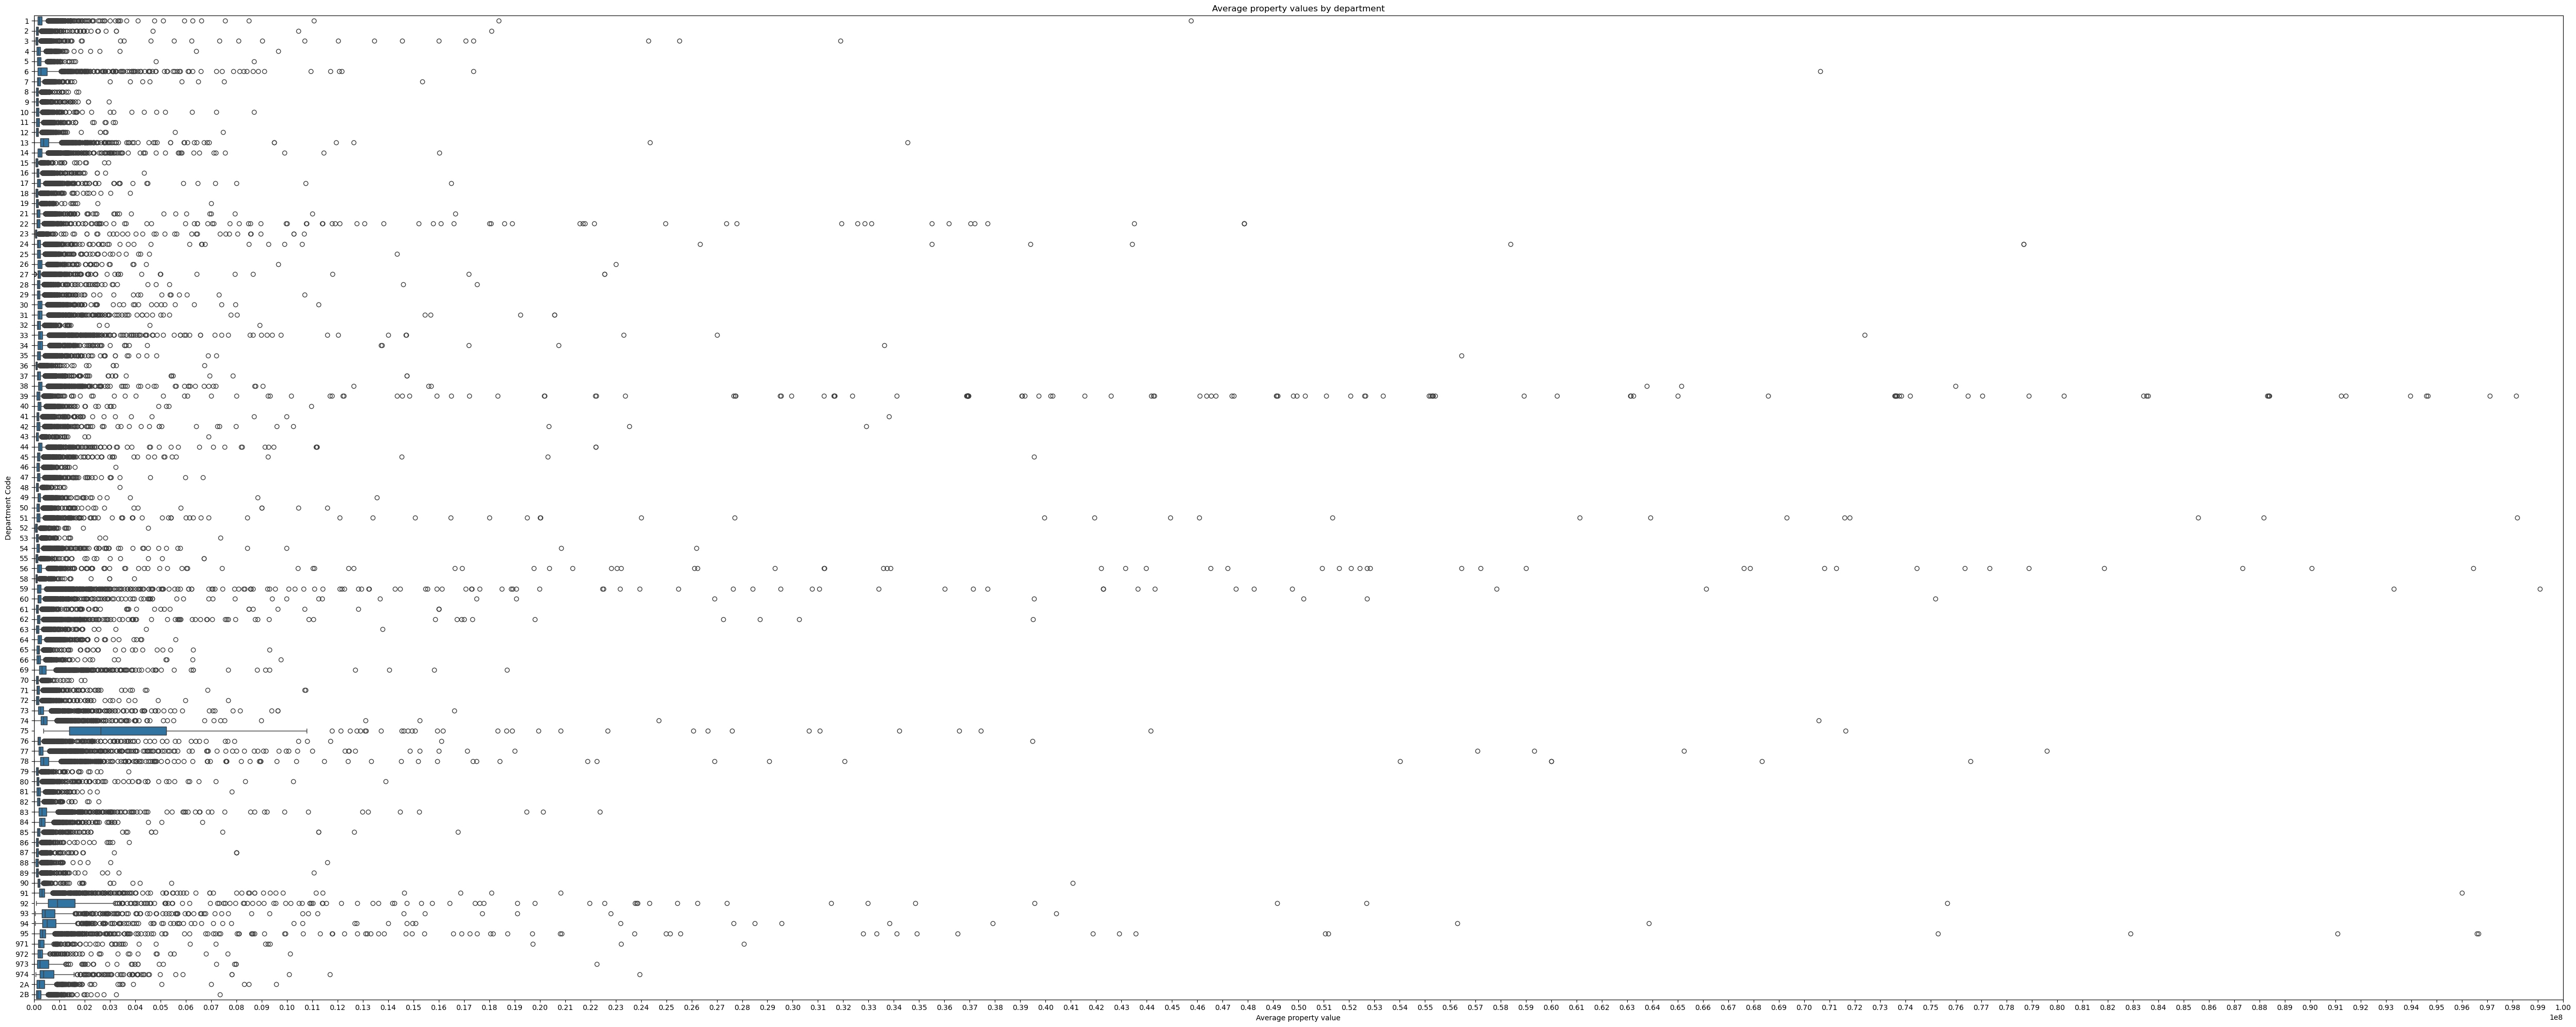

In [15]:
#### IDENTIFY OUTLIERS ####
plt.figure(figsize=(50, 20))
sns.boxplot(data=grouped_geo, x='mean_value', y='Code departement')

plt.title('Average property values by department')
plt.xlabel('Average property value')
plt.ylabel('Department Code')
x_ticks = np.arange(0, grouped_geo['mean_value'].max(), step=1000000)
plt.xticks(x_ticks)
plt.xlim(-10, 100000000)
plt.tight_layout()

plt.show()

There are a lot of outliers , this can be explained because of the type of local sold, the year they were sold (inflation ?), their size or their localization. Let's analyze that.

In [16]:
#### SEPARATE OUTLIERS WITH IQR ####
Q1 = df_geo['Valeur fonciere'].quantile(0.25)
Q3 = df_geo['Valeur fonciere'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_geo[(df_geo['Valeur fonciere'] < lower_bound) | (df_geo['Valeur fonciere'] > upper_bound)]
non_outliers = df_geo[(df_geo['Valeur fonciere'] >= lower_bound) & (df_geo['Valeur fonciere'] <= upper_bound)]

outliers.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,price_per_sq_meter
117,2019-03-07 00:00:00.000000000,Vente,3000000.0,MARECHAL JUIN,1000.0,BOURG-EN-BRESSE,1,53,0,4.0,Local industriel. commercial ou assimilé,2465.0,0.0,5926.0,2019,1217.04
1813,2019-08-14 08:43:38.181818112,Vente,644100.0,DU PLAN D'EAU,1370.0,VAL-REVERMONT,1,426,0,4.0,Local industriel. commercial ou assimilé,2191.0,0.0,5247.0,2019,293.98
1814,2019-07-31 10:54:32.727272704,Vente,644100.0,DU PLAN D'EAU,1370.0,VAL-REVERMONT,1,426,0,4.0,Local industriel. commercial ou assimilé,2191.0,0.0,5000.0,2019,293.98
2564,2019-06-11 00:00:00.000000000,Vente,720000.0,DU 1ER SEPTEMBRE 1944,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,438.0,0.0,273.0,2019,1643.84
2565,2019-07-11 09:36:00.000000000,Vente,720000.0,DU 1ER SEPTEMBRE 1944,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,782.0,0.0,559.0,2019,920.72


We see that a lot of them are commercial or industrial locals which could explain why they are expensive.

In [17]:
#### GROUPING OUTLIERS BY DEPARTMENT AND COMMUNE ####
grouped_outliers = outliers.groupby(['Code departement', 'Commune', 'annee', 'Type local'], observed=True).agg(
    mean_outliers_value=('Valeur fonciere', 'mean'),
    median_outliers_value=('Valeur fonciere', 'median'),
    sum_outliers_value=('Valeur fonciere', 'sum'),
    count_outliers_transactions=('Valeur fonciere', 'count'),
    outliers_avg_price_per_sq_meter=('price_per_sq_meter', 'mean')
).reset_index()

grouped_outliers.head()

,Code departement,Commune,annee,Type local,mean_outliers_value,median_outliers_value,sum_outliers_value,count_outliers_transactions,outliers_avg_price_per_sq_meter
0,1,AMBERIEU-EN-BUGEY,2019,Local industriel. commercial ou assimilé,1.245712e+06,1375200.0,3737135.0,3,3534.546667
1,1,AMBERIEU-EN-BUGEY,2019,Maison,5.692688e+06,5692688.5,5692688.5,1,50377.770000
2,1,AMBERIEU-EN-BUGEY,2020,Local industriel. commercial ou assimilé,3.344064e+06,1300000.0,16720322.0,5,66392.688000
3,1,AMBERIEU-EN-BUGEY,2021,Appartement,1.938000e+06,2130000.0,19380000.0,10,26795.484000
4,1,AMBERIEU-EN-BUGEY,2021,Local industriel. commercial ou assimilé,2.712970e+06,2847371.0,21703761.5,8,2906.227500


In [18]:
grouped_outliers.isnull().sum()

Code departement                   0
Commune                            0
annee                              0
Type local                         0
mean_outliers_value                0
median_outliers_value              0
sum_outliers_value                 0
count_outliers_transactions        0
outliers_avg_price_per_sq_meter    0
dtype: int64

In [19]:
#### METRICS COMPARISON ####

# All
mean_all = df_geo['Valeur fonciere'].mean()
median_all = df_geo['Valeur fonciere'].median()

# Non-outliers
mean_non_outliers = non_outliers['Valeur fonciere'].mean()
median_non_outliers = non_outliers['Valeur fonciere'].median()

# Outliers
mean_outliers = outliers['Valeur fonciere'].mean()
median_outliers = outliers['Valeur fonciere'].median()

print("General mean :", mean_all)
print("General median :", median_all)
print("\nNon-outliers mean :", mean_non_outliers)
print("Non-outliers median :", median_non_outliers)
print("\nOutliers mean :", mean_outliers)
print("Outliers median :", median_outliers)


General mean : 885459.2904764488
General median : 191900.0

Non-outliers mean : 205565.86862418838
Non-outliers median : 177450.0

Outliers mean : 8005812.542774477
Outliers median : 1070000.0


We see that the general metrics are greatly affected by the outliers, which is why it is necessary to separate them from the rest.

## 3 - Results ##

Presentation of the analyses, visualizations, and findings.

Visualizations:
- Interactive maps of property values by department/commune.
- Bar charts or heatmaps comparing average prices by region.

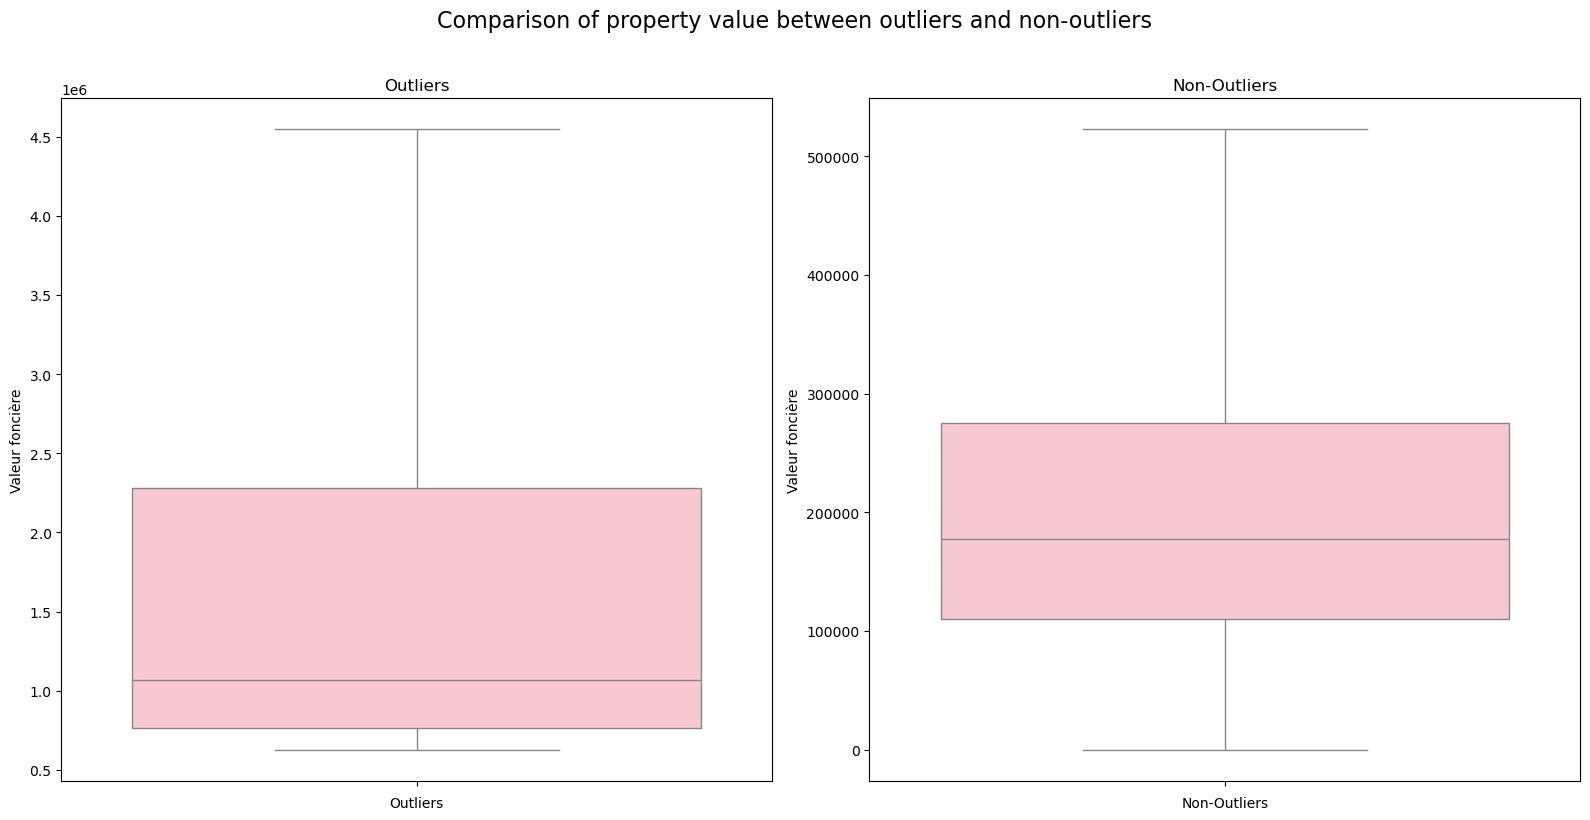

In [20]:
#### COMPARISON BW OUTLIERS AND NON-OUTLIERS ####
plt.figure(figsize=(16, 8))
plt.suptitle("Comparison of property value between outliers and non-outliers", fontsize=16, y=1.02)

# Outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=outliers['Valeur fonciere'], color='pink', showfliers=False)
plt.title('Outliers')
plt.ylabel('Valeur foncière')
plt.xlabel('Outliers')

# Non-outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=non_outliers['Valeur fonciere'], color='pink', showfliers=False)
plt.title('Non-Outliers')
plt.ylabel('Valeur foncière')
plt.xlabel('Non-Outliers')

plt.tight_layout()
plt.show()


We see that the outliers start at 500 000€, exactly where the non outliers stop, and they go up to 4 500 000€.

In [21]:
#### TYPE LOCAL COMPARISON BW OUTLIERS AND NON-OUTLIERS ####

colors = px.colors.qualitative.Pastel

# Count type local
outliers_tl_count = outliers['Type local'].value_counts()
non_outliers_tl_count = non_outliers['Type local'].value_counts()

# Subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Outliers", "Non-Outliers"),
    specs=[[{"type": "pie"}, {"type": "pie"}]]
)

# Outliers
fig.add_trace(
    go.Pie(
    labels = outliers_tl_count.index,
    values = outliers_tl_count,
    name = 'Type local',
    marker = dict(colors = colors),
    ),
    row=1, col=1
)

# Non-outliers
fig.add_trace(
    go.Pie(
        labels = non_outliers_tl_count.index,
        values = non_outliers_tl_count,
        name = 'Type local',
        marker = dict(colors = colors),
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="Comparison of local types between outliers and non-outliers",
    showlegend=True
)
fig.show()

We can see that the majority of local types are appartments then houses for both but for the outliers, the portion of industrial local is greater than for non outliers.

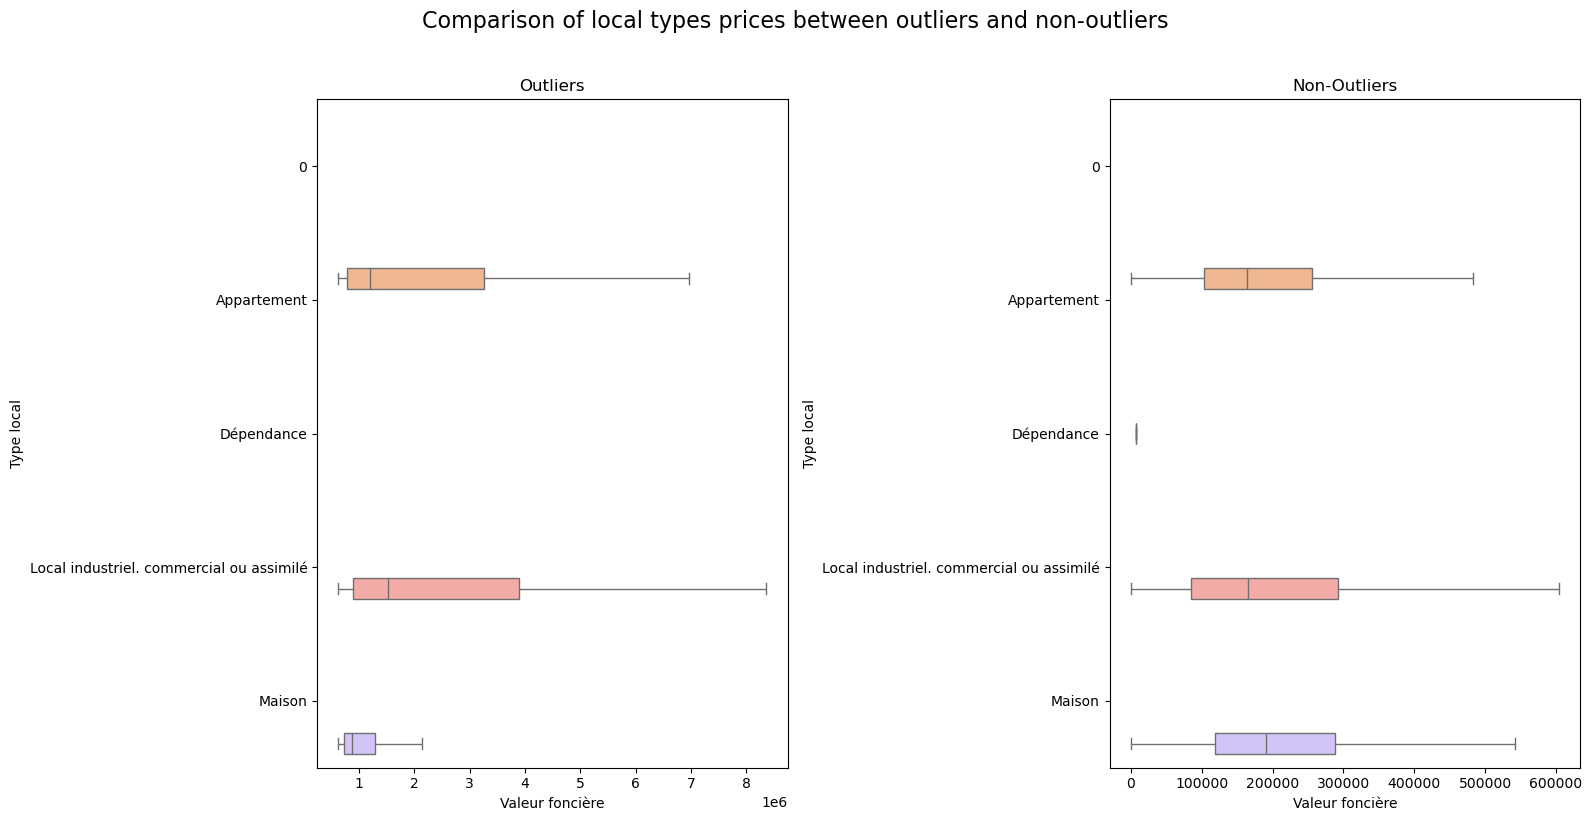

In [22]:
#### COMPARISON BW OUTLIERS AND NON-OUTLIERS ####
plt.figure(figsize=(16, 8))
plt.suptitle("Comparison of local types prices between outliers and non-outliers", fontsize=16, y=1.02)

# Outliers
plt.subplot(1, 2, 1)
sns.boxplot(x='Valeur fonciere', y='Type local', data=outliers, hue='Type local', palette='pastel', showfliers=False, dodge='False')
plt.title('Outliers')
plt.ylabel('Type local')
plt.xlabel('Valeur foncière')

# Non-outliers
plt.subplot(1, 2, 2)
sns.boxplot(x='Valeur fonciere', y='Type local', data=non_outliers, hue='Type local', palette='pastel', showfliers=False, dodge='False')
plt.title('Non-Outliers')
plt.ylabel('Type local')
plt.xlabel('Valeur foncière')

plt.tight_layout()
plt.show()


We can see that the proce range for apartments are from 1M€ to 7M€ for outliers and only up to 450 000€ for non-outliers.

Now let's try to see where these outliers are located :
- Run interactive_maps_geo.ipynb to see maps of the price per square meter by departments depending of if they're outliers or not.

- Run interactive_maps_geo.ipynb to see maps of the average price per square meter by region.

Now let's study the number of sales per year per region.

In [23]:
#### GROUPING NON-OUTLIERS BY DEPARTMENT AND COMMUNE ####
grouped_non_outliers = non_outliers.groupby(['Code departement', 'Commune', 'annee', 'Type local'], observed=True).agg(
    mean_outliers_value=('Valeur fonciere', 'mean'),
    median_outliers_value=('Valeur fonciere', 'median'),
    sum_outliers_value=('Valeur fonciere', 'sum'),
    count_non_outliers_transactions=('Valeur fonciere', 'count'),
    outliers_avg_price_per_sq_meter=('price_per_sq_meter', 'mean')
).reset_index()

grouped_non_outliers.head()

,Code departement,Commune,annee,Type local,mean_outliers_value,median_outliers_value,sum_outliers_value,count_non_outliers_transactions,outliers_avg_price_per_sq_meter
0,1,ABERGEMENT-DE-VAREY (L ),2019,Maison,148690.000000,103650.0,743450.0,5,1268.020000
1,1,ABERGEMENT-DE-VAREY (L ),2020,Maison,80125.000000,80125.0,160250.0,2,2022.910000
2,1,ABERGEMENT-DE-VAREY (L ),2021,Appartement,450000.000000,450000.0,1350000.0,3,4226.540000
3,1,ABERGEMENT-DE-VAREY (L ),2021,Maison,235325.000000,199500.0,941300.0,4,1867.542500
4,1,ABERGEMENT-DE-VAREY (L ),2022,Maison,330966.666667,299900.0,992900.0,3,2575.603333


In [24]:
#### DICTIONNARY TO ASSOCIATE EACH DEPARTMENT TO ITS REGION ####
departement_to_region = {
    # Auvergne-Rhône-Alpes
    1: 'Auvergne-Rhône-Alpes', 3: 'Auvergne-Rhône-Alpes', 7: 'Auvergne-Rhône-Alpes',
    15: 'Auvergne-Rhône-Alpes', 26: 'Auvergne-Rhône-Alpes', 38: 'Auvergne-Rhône-Alpes',
    42: 'Auvergne-Rhône-Alpes', 43: 'Auvergne-Rhône-Alpes', 63: 'Auvergne-Rhône-Alpes',
    69: 'Auvergne-Rhône-Alpes', 73: 'Auvergne-Rhône-Alpes', 74: 'Auvergne-Rhône-Alpes',
    
    # Bourgogne-Franche-Comté
    21: 'Bourgogne-Franche-Comté', 25: 'Bourgogne-Franche-Comté', 39: 'Bourgogne-Franche-Comté',
    58: 'Bourgogne-Franche-Comté', 70: 'Bourgogne-Franche-Comté', 71: 'Bourgogne-Franche-Comté',
    89: 'Bourgogne-Franche-Comté', 90: 'Bourgogne-Franche-Comté',
    
    # Bretagne
    22: 'Bretagne', 29: 'Bretagne', 35: 'Bretagne', 56: 'Bretagne',
    
    # Centre-Val de Loire
    18: 'Centre-Val de Loire', 28: 'Centre-Val de Loire', 36: 'Centre-Val de Loire',
    37: 'Centre-Val de Loire', 41: 'Centre-Val de Loire', 45: 'Centre-Val de Loire',
    
    # Corse
    2: 'Corse', 20: 'Corse',  '2A': 'Corse', '2B': 'Corse',
    
    # Grand Est
    8: 'Grand Est', 10: 'Grand Est', 51: 'Grand Est', 52: 'Grand Est',
    54: 'Grand Est', 55: 'Grand Est', 57: 'Grand Est', 67: 'Grand Est',
    68: 'Grand Est', 88: 'Grand Est',
    
    # Hauts-de-France
    2: 'Hauts-de-France', 59: 'Hauts-de-France', 60: 'Hauts-de-France',
    62: 'Hauts-de-France', 80: 'Hauts-de-France',
    
    # Île-de-France
    75: 'Île-de-France', 77: 'Île-de-France', 78: 'Île-de-France', 91: 'Île-de-France',
    92: 'Île-de-France', 93: 'Île-de-France', 94: 'Île-de-France', 95: 'Île-de-France',
    
    # Normandie
    14: 'Normandie', 27: 'Normandie', 50: 'Normandie', 61: 'Normandie', 76: 'Normandie',
    
    # Nouvelle-Aquitaine
    16: 'Nouvelle-Aquitaine', 17: 'Nouvelle-Aquitaine', 19: 'Nouvelle-Aquitaine',
    23: 'Nouvelle-Aquitaine', 24: 'Nouvelle-Aquitaine', 33: 'Nouvelle-Aquitaine',
    40: 'Nouvelle-Aquitaine', 47: 'Nouvelle-Aquitaine', 64: 'Nouvelle-Aquitaine',
    79: 'Nouvelle-Aquitaine', 86: 'Nouvelle-Aquitaine', 87: 'Nouvelle-Aquitaine',
    
    # Occitanie
    9: 'Occitanie', 11: 'Occitanie', 12: 'Occitanie', 30: 'Occitanie', 31: 'Occitanie',
    32: 'Occitanie', 34: 'Occitanie', 46: 'Occitanie', 48: 'Occitanie', 65: 'Occitanie',
    66: 'Occitanie', 81: 'Occitanie', 82: 'Occitanie',
    
    # Pays de la Loire
    44: 'Pays de la Loire', 49: 'Pays de la Loire', 53: 'Pays de la Loire',
    72: 'Pays de la Loire', 85: 'Pays de la Loire',
    
    # Provence-Alpes-Côte d'Azur
    4: 'Provence-Alpes-Côte d\'Azur', 5: 'Provence-Alpes-Côte d\'Azur',
    6: 'Provence-Alpes-Côte d\'Azur', 13: 'Provence-Alpes-Côte d\'Azur',
    83: 'Provence-Alpes-Côte d\'Azur', 84: 'Provence-Alpes-Côte d\'Azur',
    
    # DROM (Départements d'outre-mer)
    971: 'Guadeloupe', 972: 'Martinique', 973: 'Guyane', 974: 'La Réunion', 976: 'Mayotte'
}

grouped_geo ['region'] = grouped_geo['Code departement'].map(departement_to_region)
grouped_outliers['region'] = grouped_outliers['Code departement'].map(departement_to_region)
grouped_non_outliers['region'] = grouped_non_outliers['Code departement'].map(departement_to_region)


In [25]:
grouped_non_outliers.head()

,Code departement,Commune,annee,Type local,mean_outliers_value,median_outliers_value,sum_outliers_value,count_non_outliers_transactions,outliers_avg_price_per_sq_meter,region
0,1,ABERGEMENT-DE-VAREY (L ),2019,Maison,148690.000000,103650.0,743450.0,5,1268.020000,Auvergne-Rhône-Alpes
1,1,ABERGEMENT-DE-VAREY (L ),2020,Maison,80125.000000,80125.0,160250.0,2,2022.910000,Auvergne-Rhône-Alpes
2,1,ABERGEMENT-DE-VAREY (L ),2021,Appartement,450000.000000,450000.0,1350000.0,3,4226.540000,Auvergne-Rhône-Alpes
3,1,ABERGEMENT-DE-VAREY (L ),2021,Maison,235325.000000,199500.0,941300.0,4,1867.542500,Auvergne-Rhône-Alpes
4,1,ABERGEMENT-DE-VAREY (L ),2022,Maison,330966.666667,299900.0,992900.0,3,2575.603333,Auvergne-Rhône-Alpes


In [26]:
#### DELETE ROWS WHERE 'REGION' IS NULL ####
grouped_geo.dropna(subset=['region'], inplace=True)

grouped_outliers.dropna(subset=['region'], inplace=True)

grouped_non_outliers.dropna(subset=['region'], inplace=True)
grouped_outliers.isnull().sum()

Code departement                   0
Commune                            0
annee                              0
Type local                         0
mean_outliers_value                0
median_outliers_value              0
sum_outliers_value                 0
count_outliers_transactions        0
outliers_avg_price_per_sq_meter    0
region                             0
dtype: int64

In [29]:
#### OUTLIERS NUMBER OF SALES PER REGION PER YEAR ####

def show_data(annee):
    data_general=grouped_geo[grouped_geo['annee'] == annee]
    data_outliers=grouped_outliers[grouped_outliers['annee'] == annee]
    data_non_outliers=grouped_non_outliers[grouped_non_outliers['annee'] == annee]
    
    plt.figure(figsize=(18, 9))
    plt.suptitle("Comparison of number of transactions by region between outliers and non-outliers", fontsize=16, y=1.02)

    # General
    plt.subplot(3, 1, 1)
    plt.bar(data_general['region'], data_general['count_transactions'], color='pink')
    plt.ylim(0, 5000)
    plt.xticks(rotation=45)
    plt.title('General')
    plt.ylabel('Number of sales')
    plt.xlabel('Region')

    # Outliers
    plt.subplot(3, 1, 2)
    plt.bar(data_outliers['region'], data_outliers['count_outliers_transactions'], color='skyblue')
    plt.ylim(0, 4000)
    plt.xticks(rotation=45)
    plt.title('Outliers')
    plt.ylabel('Number of sales')
    plt.xlabel('Region')
    
     # Non-outliers
    plt.subplot(3, 1, 3)
    plt.bar(data_non_outliers['region'], data_non_outliers['count_non_outliers_transactions'], color='salmon')
    plt.ylim(0,5000)
    plt.xticks(rotation=45)
    plt.title('Non-outliers')
    plt.ylabel('Number of sales')
    plt.xlabel('Region')
    
    #plt.subplots_adjust(wspace=4)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Slider
widgets.interact(
    show_data, 
    annee=widgets.IntSlider(
        min=grouped_outliers['annee'].min(), 
        max=grouped_outliers['annee'].max(), 
        step=1, 
        description='Year')
    )

interactive(children=(IntSlider(value=2019, description='Year', max=2024, min=2019), Output()), _dom_classes=(…

<function __main__.show_data(annee)>

## 4 - Conlusion and recommandations ##

Summary of discoveries and investment advice.

Conclusions:
- Identify regions with the highest or lowest property values.
- Spot any geographical anomalies in property prices.

Recommendations :
- Investment advice based on regions with strong growth or attractive prices.
- Suggestions on how to leverage geographical trends for better returns.